In [1]:
#Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing, Normalizing

from sklearn.preprocessing import StandardScaler

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.drop('id', axis = 1, inplace = True)
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(69976, 12)

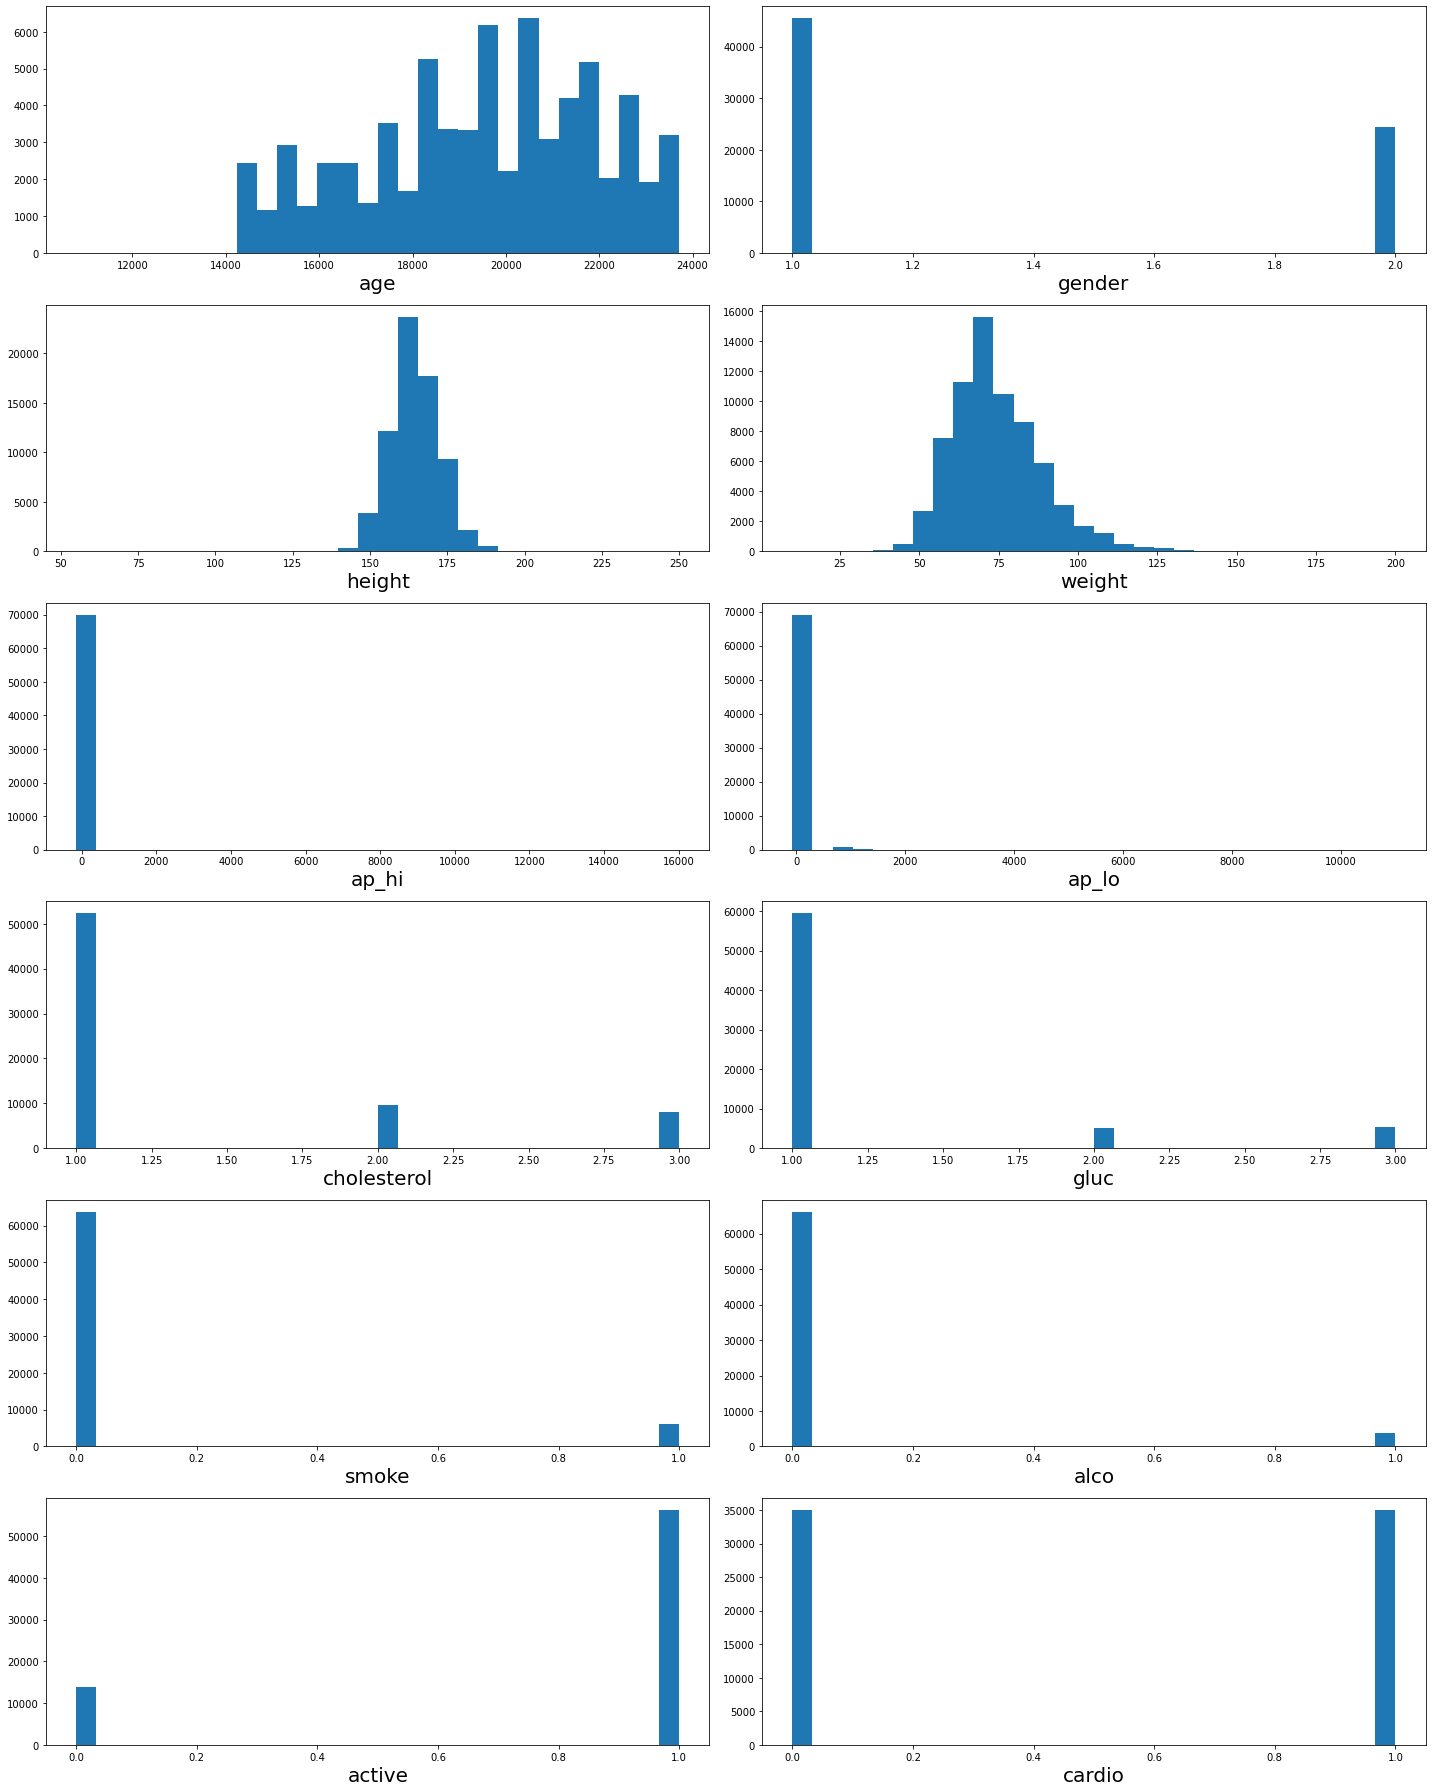

In [8]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6, 2, plotnumber)
        plt.hist(df[column], bins = 30)
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [9]:
from scipy.stats import zscore

z_score = zscore(df[['age', 'height', 'ap_hi', 'weight', 'ap_lo']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df= df[filtering_entry]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000
mean,19466.951531,1.347339,164.372441,73.569152,126.173552,81.288053,1.362153,1.223609,0.087239,0.053187,0.803712,0.492938
std,2467.016002,0.476128,7.692655,13.202960,17.854738,10.235287,0.677132,0.569561,0.282187,0.224408,0.397192,0.499954
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


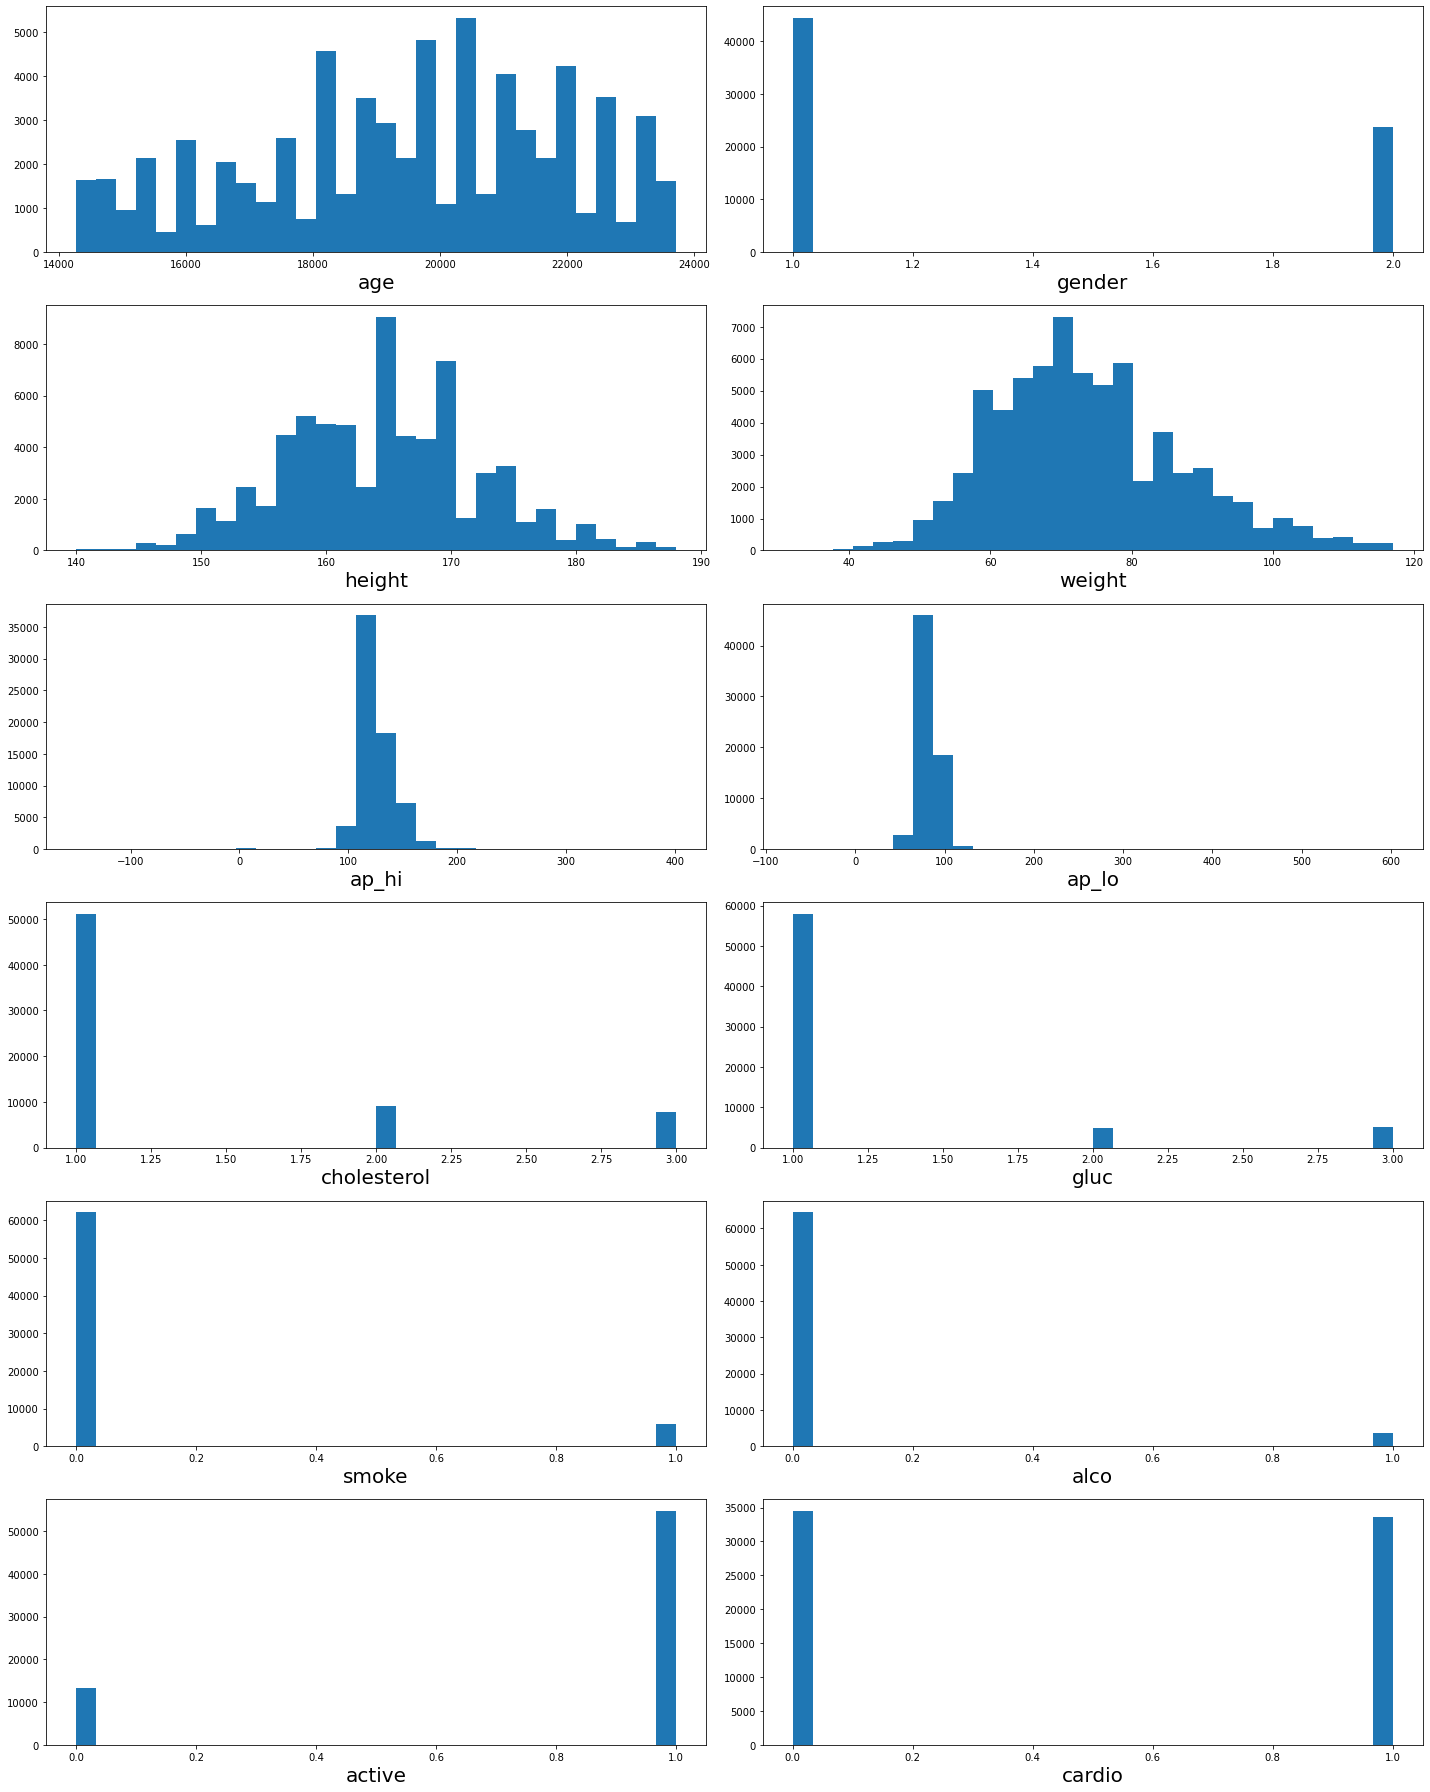

In [10]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6, 2, plotnumber)
        plt.hist(df[column], bins = 30)
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [11]:
X = df.drop(columns = ['cardio'], axis = 1)
y = df['cardio']

In [12]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

vif = pd.DataFrame()
vif['score'] = [variance_inflation_factor(X_scaler, i) for i in range(X_scaler.shape[1])]
vif['feature'] = X.columns
vif

,score,feature
0,1.071023,age
1,1.508324,gender
2,1.520919,height
3,1.222068,weight
4,1.658059,ap_hi
5,1.607518,ap_lo
6,1.317978,cholesterol
7,1.257675,gluc
8,1.249232,smoke
9,1.140165,alco


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.25, random_state = 41)
clf = RandomForestClassifier()

params = {'n_estimators': [13, 15],
         'criterion': ['entropy'],
         'max_depth': [10, 15],
         'min_samples_split': [10, 11],
         'min_samples_leaf': [5, 6]}

grd = GridSearchCV(clf, param_grid = params)
grd.fit(x_train, y_train)
print('Best Parameters: ', grd.best_params_)

clf = grd.best_estimator_ #reinstantiating with best params

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix: ', rf_conf_mat)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}
Confusion matrix:  [[6781 1780]
 [2718 5732]]
Accuracy score:  0.7355828581506084


In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8561
           1       0.76      0.68      0.72      8450

    accuracy                           0.74     17011
   macro avg       0.74      0.74      0.73     17011
weighted avg       0.74      0.74      0.73     17011



## Plotting ROC AUC to choose best model

In [15]:
#Plot ROC/AUC for multiple models without hyperparameter tuning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [16]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [17]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
lr.score(x_test, y_test)

0.728822526600435

In [21]:
dt.score(x_test, y_test)

0.6362941626006702

In [22]:
rf.score(x_test, y_test)

0.7171829992357887

In [23]:
kn.score(x_test, y_test)

0.6979013579448592

## Lets find ROC AUC Score

In [24]:
#Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.7170194338022503

In [25]:
#Logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.7284668881656114

In [26]:
#Decision Tree
roc_auc_score(y_test, dt.predict(x_test))

0.6361977358448835

In [27]:
#KNN
roc_auc_score(y_test, kn.predict(x_test))

0.6977599876694159

## Lets check ROC AUC curve for the fitted model

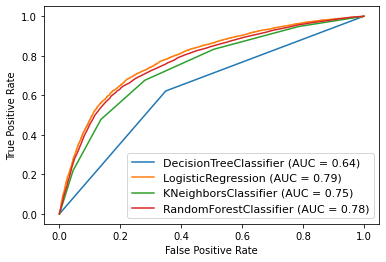

In [28]:
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax = disp.ax_) #ax_ = Axes with confusion matrix
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size': 11}, loc = 'lower right')
plt.show()